# Importing libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression






import re
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)



# Data Exploration

In [4]:
df = pd.read_csv('Bank_churn.csv', index_col='id')

In [5]:
df.head()

,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Rating,Exited,"Geography:str,Gender:str"
id,,,,,,,,,,,,,
0.0,15674932.0,"O,k{wudilic_-huk>wu_",668.0,33.0,3.0,0.00,2.0,1.0,0.0,181449.97,-3,0,"{'Geography': 'Paris-France','Gender': 'Male'}"
1.0,15749177.0,"O{kwudi""li#%%'oli=-sa",627.0,33.0,1.0,0.00,2.0,1.0,1.0,49503.5,0,0,"{'Geography': 'Paris-France','Gender': 'Male'}"
2.0,15694510.0,Hsueh,678.0,40.0,10.0,0.00,2.0,1.0,0.0,184866.69,1,0,"{'Geography': 'Paris-France','Gender': 'Male'}"
3.0,15741417.0,"Kao,]?>?%]@",581.0,34.0,2.0,148882.54,1.0,1.0,1.0,84560.88,-4,0,"{'Geography': 'Paris-France','Gender': 'Male'}"
4.0,15766172.0,Ch-i]emen'-am,716.0,33.0,5.0,0.00,2.0,1.0,1.0,15068.83,-1,0,"{'Geography': 'Madrid-Spain','Gender': 'Male'}"


In [6]:
df.shape

(165034, 13)

In [7]:
df.isna().sum().sort_values(ascending=False)

,0
CustomerId,7526
Age,5599
NumOfProducts,5521
Tenure,4707
EstimatedSalary,4377
Balance,4041
Surname,3917
IsActiveMember,3525
HasCrCard,2843
CreditScore,370


In [8]:
(df.isna().sum()/len(df)).sort_values(ascending=False)

,0
CustomerId,0.045603
Age,0.033926
NumOfProducts,0.033454
Tenure,0.028521
EstimatedSalary,0.026522
Balance,0.024486
Surname,0.023735
IsActiveMember,0.021359
HasCrCard,0.017227
CreditScore,0.002242


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 165034 entries, 0.0 to 165033.0
Data columns (total 13 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   CustomerId                157508 non-null  float64
 1   Surname                   161117 non-null  object 
 2   CreditScore               164664 non-null  float64
 3   Age                       159435 non-null  object 
 4   Tenure                    160327 non-null  float64
 5   Balance                   160993 non-null  float64
 6   NumOfProducts             159513 non-null  float64
 7   HasCrCard                 162191 non-null  float64
 8   IsActiveMember            161509 non-null  float64
 9   EstimatedSalary           160657 non-null  object 
 10  Rating                    165034 non-null  int64  
 11  Exited                    165034 non-null  int64  
 12  Geography:str,Gender:str  165034 non-null  object 
dtypes: float64(7), int64(2), object(4)
memory usa

I notice that the `Age`, `EstimatedSalary` column is object
need to be edited

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerId,157508.0,1.569204e+07,71375.114738,15565701.0,15633213.0,15690169.0,15756835.00,15815690.00
CreditScore,164664.0,6.564647e+02,80.103353,350.0,597.0,659.0,710.00,850.00
Tenure,160327.0,5.022304e+00,2.806686,0.0,3.0,5.0,7.00,10.00
Balance,160993.0,5.549794e+04,62808.409912,0.0,0.0,0.0,119960.29,250898.09
NumOfProducts,159513.0,1.554745e+00,0.547085,1.0,1.0,2.0,2.00,4.00
HasCrCard,162191.0,7.539444e-01,0.430713,0.0,1.0,1.0,1.00,1.00
IsActiveMember,161509.0,4.976751e-01,0.499996,0.0,0.0,0.0,1.00,1.00
Rating,165034.0,-5.041082e-01,2.871074,-5.0,-3.0,0.0,2.00,4.00
Exited,165034.0,2.115988e-01,0.408443,0.0,0.0,0.0,0.00,1.00


In [11]:
df.describe(include='object').T

,count,unique,top,freq
Surname,161117,154831,T'ien,111
Age,159435,500,38.0,8897
EstimatedSalary,160657,54398,88890.05,174
"Geography:str,Gender:str",165034,12,"{'Geography': 'Paris-France','Gender': 'Male'}",51226


In [12]:
df.duplicated().sum()

np.int64(0)

array([[<Axes: title={'center': 'CustomerId'}>,
        <Axes: title={'center': 'CreditScore'}>,
        <Axes: title={'center': 'Tenure'}>,
        <Axes: title={'center': 'Balance'}>,
        <Axes: title={'center': 'NumOfProducts'}>],
       [<Axes: title={'center': 'HasCrCard'}>,
        <Axes: title={'center': 'IsActiveMember'}>,
        <Axes: title={'center': 'Rating'}>,
        <Axes: title={'center': 'Exited'}>, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >]], dtype=object)

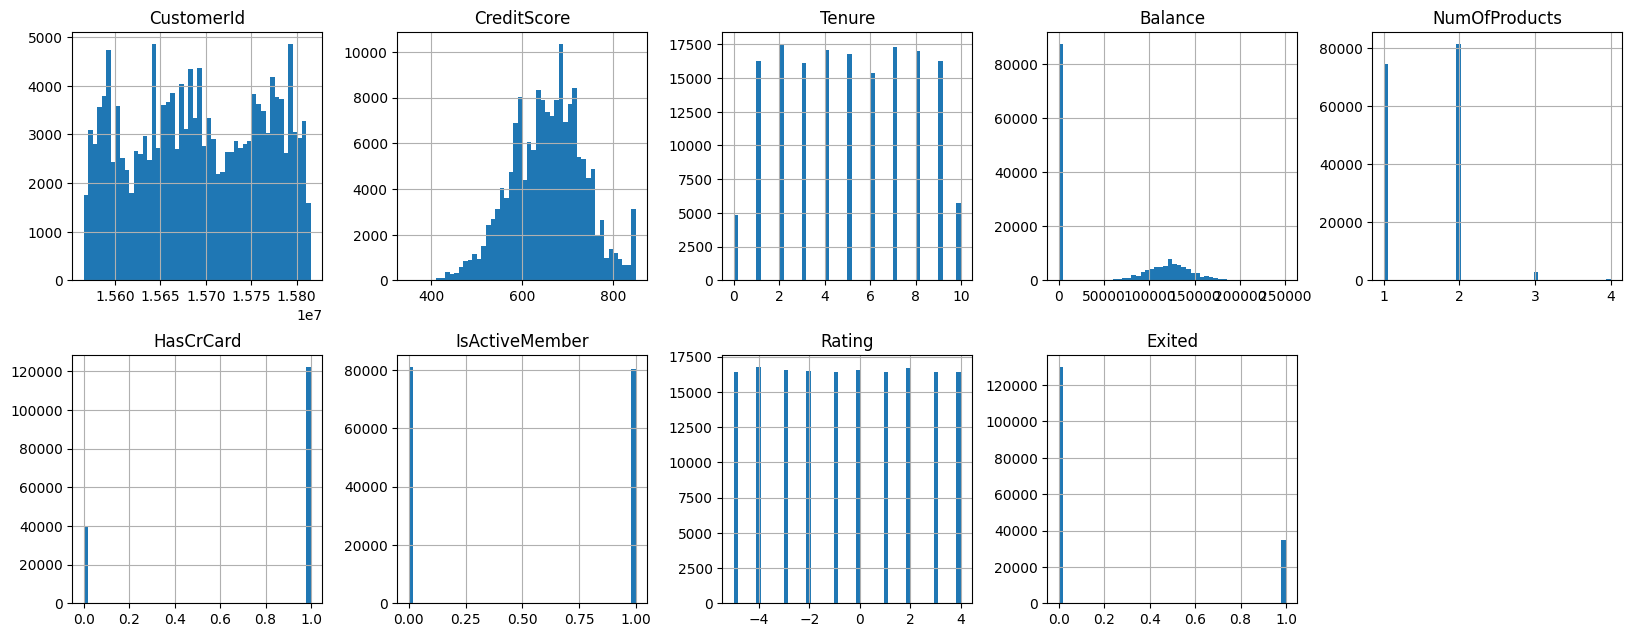

In [13]:
df.hist(figsize=(20, 20), bins=50, layout=(5, 5))

# Cleaning

In [14]:
df.columns

Index(['CustomerId', 'Surname', 'CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Rating', 'Exited', 'Geography:str,Gender:str'],
      dtype='object')

## `CustomerId` Column

In [15]:
df['CustomerId'].value_counts()


,count
CustomerId,
15682355.0,117
15570194.0,96
15648067.0,90
15585835.0,89
15595588.0,89
...,...
15765263.0,1
15754536.0,1
15804023.0,1


It's said in the data description that the `CustomerId` is unique identifier for the customer account.
but there is duplicates in the data !!!

In [16]:
df['CustomerId'].isna().sum()

np.int64(7526)

In [17]:
df[df['CustomerId'] == 15682355.0].head(10)


,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Rating,Exited,"Geography:str,Gender:str"
id,,,,,,,,,,,,,
273.0,15682355.0,"H;*$;s+}u>|e,|.h(>&)#]'",727.0,35.0,9.0,140966.55,NaN,1.0,1.0,179227.21,0,0,"{'Geography': 'Berlin-Gernay','Gender': 'Male'}"
2565.0,15682355.0,"[$_T{>,|=]#i{(}&e}>n(/.$(",744.0,37.0,6.0,0.00,2.0,1.0,1.0,137944.16,-2,0,"{'Geography': 'Paris-France','Gender': 'Male'}"
5063.0,15682355.0,N]*i-u,790.0,44.0,1.0,128100.75,1.0,1.0,NaN,NaN,2,1,"{'Geography': 'Madrid-Spain','Gender': 'nan'}"
11942.0,15682355.0,$(Hsue}h%,616.0,43.0,9.0,NaN,2.0,0.0,1.0,132741.56,4,0,"{'Geography': 'Paris-France','Gender': 'Female'}"
13009.0,15682355.0,'#Mann>a,652.0,33.0,7.0,0.00,2.0,1.0,NaN,112333.22,-1,0,"{'Geography': 'Madrid-Spain','Gender': 'Female'}"
15631.0,15682355.0,+P};'-'#][>a.!n>,663.0,60.0,2.0,155413.08,1.0,1.0,1.0,54702.66,-5,0,"{'Geography': 'Paris-France','Gender': 'Male'}"
15649.0,15682355.0,Chuk;(?w>ub;*uik>+#em,635.0,30.0,9.0,115115.39,1.0,1.0,0.0,124902.72,4,0,"{'Geography': 'Berlin-Gernay','Gender': 'nan'}"
16051.0,15682355.0,;;<+M_$]\]i.>l<a^}%=!&[n|-o,653.0,48.0,3.0,122552.34,1.0,0.0,0.0,162719.69,0,1,"{'Geography': 'Berlin-Gernay','Gender': 'Female'}"
16218.0,15682355.0,"Sab(>}bati*ni,%",772.0,38.0,7.0,75075.31,NaN,1.0,1.0,92888.52,-3,0,"{'Geography': 'Berlin-Gernay','Gender': 'Male'}"


In [18]:
df.drop(columns=['CustomerId'], inplace=True)

## `Surname` Column

In [19]:
df['Surname'].isna().sum()

np.int64(3917)

In [20]:
df['Surname'].value_counts()

,count
Surname,
T'ien,111
Hsia,91
Ts'ui,81
P'eng,75
Maclean,73
...,...
"@[""[:'\W%&}=<en*t<%wort"">h-;Shield{s&)",1
"B,<{>)_#/\on""}\""^:%i%\|#,",1
"H""%(su/""!!_->%|eh!>],$?""*{,",1


In [21]:
def clean_surname(name):
    if pd.isnull(name):
        return None
    cleaned = re.sub(r'[^a-zA-Z]', '', name)
    return cleaned if len(cleaned) > 0 else None


df['Surname'] = df['Surname'].apply(clean_surname)



In [22]:
df['Surname'].value_counts()

,count
Surname,
Tien,3336
Hsia,2393
Chiu,1775
Tsui,1611
Hs,1579
...,...
Christmas,1
AhMouy,1
Aliyev,1


In [23]:
df['Surname'].isna().sum()

np.int64(3917)

I see that the surname will not affect the Exited column so, I will drop it

In [24]:
df.drop(columns=['Surname'], inplace=True)

## `CreditScore` Column

In [25]:
df['CreditScore'].isna().sum()

np.int64(370)

In [26]:
df['CreditScore'].value_counts()

,count
CreditScore,
850.0,2531
678.0,2291
684.0,1713
667.0,1653
705.0,1597
...,...
419.0,1
386.0,1
358.0,1


In [27]:
df['CreditScore'].fillna(df['CreditScore'].median(), inplace=True)

<Axes: >

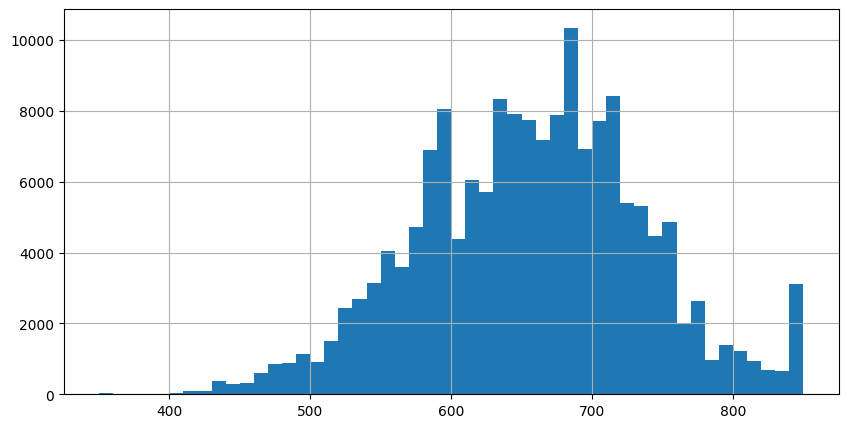

In [28]:
df['CreditScore'].hist(figsize=(10, 5), bins=50)

## `Age` Column

In [29]:
df['Age'].dtype

dtype('O')

In [30]:
df['Age'].isna().sum()

np.int64(5599)

In [31]:
df['Age'].unique()

array(['33.0', '40.0', '34.0', '36.0', '30.0', '37.0', '43.0', '27.0',
       nan, '71.0', '47.0', '25.0', '55.0', '61.0', '35.0', '41.0',
       '44.0', '26.0', '39.0', '31.0', '58.0', '49.0', '32.0', '50.0',
       '28.0', '45.0', '52.0', '29.0', '47.0 year old', '38.0', '54.0',
       '56.0', '46.0', '42.0', '20.0', '21.0', '23.0', '48.0', '59.0',
       '51.0', '24.0', '53.0', '62.0', '57.0', '64.0 Jahre alt', '22.0',
       '66.0', '37.0 lebendig', '-39000.0', '67.0', '64.0', '19.0',
       '73.0', '60.0', '63.0', '41.0 year old', '-480.0', '2100.0',
       '65.0', '4200.0', '75.0', '68.0', '-350.0', '69.0', '76.0',
       '-300.0', '3300.0 year old', '19.0 lebendig', '26.0 ans et',
       '18.0', '70.0', '-390.0', 'nan lebendig', '34.0 years old',
       '33.0 year old', '510.0', '81.0', '31.0 Jahre alt', '3000.0',
       'nan years old', '31.0 years old', '47.0 ans et', '74.0',
       '32000.0', '-3800.0', '40.0 year-old', '-3700.0', '29000.0',
       '72.0', '-460.0', '280.0', 

In [32]:
def clean_age(value):
    if pd.isnull(value):
        return None

    # Try to extract the first number (int or float)
    match = re.search(r'-?\d+\.?\d*', str(value))
    if match:
        age = float(match.group())
        if age < 0:
            age = -age
        if age > 10000:
            age = age / 1000
        elif age >1000:
            age = age / 100
        elif age > 100:
            age = age / 10
        return round(age)
    return None

df['Age'] = df['Age'].apply(clean_age)


In [33]:
df['Age'].value_counts()

,count
Age,
38.0,8949
37.0,8928
35.0,8802
34.0,8324
36.0,8280
...,...
78.0,9
82.0,7
84.0,4


In [34]:
df['Age'].isna().sum()

np.int64(5628)

<Axes: >

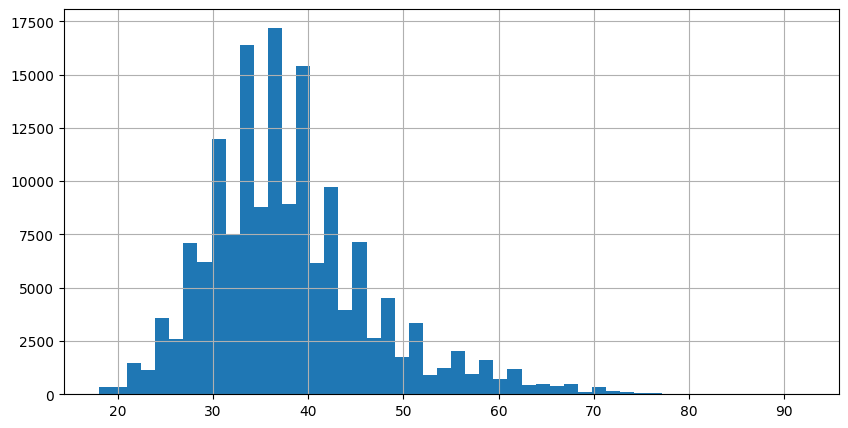

In [35]:
df['Age'].hist(figsize=(10, 5), bins=50)

In [36]:
df['Age'].fillna(df['Age'].median(), inplace=True)

## `Tenure` Column

In [37]:
df['Tenure'].isna().sum()

np.int64(4707)

In [38]:
df['Tenure'].unique()

array([ 3.,  1., 10.,  2.,  5.,  4.,  8.,  6.,  9.,  7., nan,  0.])

<Axes: >

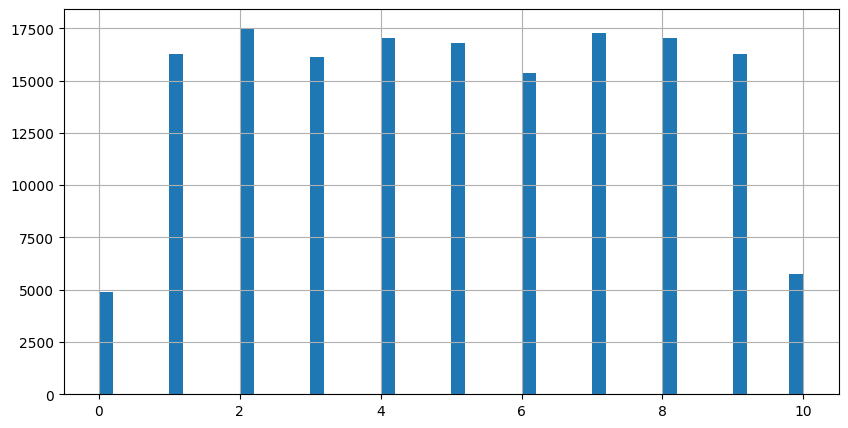

In [39]:
df['Tenure'].hist(figsize=(10, 5), bins=50)

In [40]:
# Use only rows without missing tenure to train
train_data = df[df['Tenure'].notna()]
test_data = df[df['Tenure'].isna()]

# Example: using selected features
features = ['Age', 'Balance', 'NumOfProducts']  # update as needed

model = RandomForestClassifier()
model.fit(train_data[features], train_data['Tenure'])

# Predict missing tenure
df.loc[df['Tenure'].isna(), 'Tenure'] = model.predict(test_data[features])


## `Balance` Column

In [41]:
df['Balance'].isna().sum()

np.int64(4041)

In [42]:
df['Balance'].value_counts()

,count
Balance,
0.00,87416
124577.33,84
127864.40,62
122314.50,61
129855.32,56
...,...
127675.18,1
110938.79,1
137715.69,1


<Axes: >

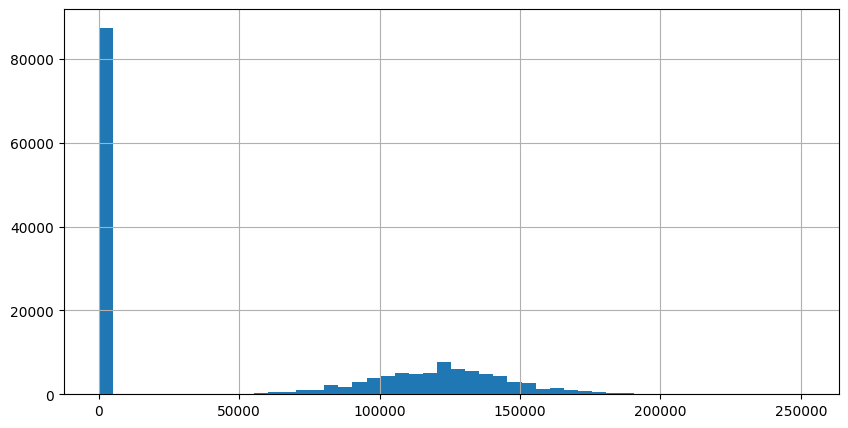

In [43]:
df['Balance'].hist(figsize=(10, 5), bins=50)

In [44]:
df['Balance'].fillna(df['Balance'].mode()[0], inplace=True)

## `NumOfProducts` Column

In [45]:
df['NumOfProducts'].isna().sum()

np.int64(5521)

In [46]:
df['NumOfProducts'].value_counts()

,count
NumOfProducts,
2.0,81530
1.0,74734
3.0,2788
4.0,461


In [47]:
# Define features to use for prediction
features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'HasCrCard', 'IsActiveMember']

# Separate data
train = df[df['NumOfProducts'].notna()]
test = df[df['NumOfProducts'].isna()]

# Train model
clf = RandomForestClassifier(random_state=42)
clf.fit(train[features], train['NumOfProducts'])

# Predict
df.loc[df['NumOfProducts'].isna(), 'NumOfProducts'] = clf.predict(test[features])

## `HasCrCard` Column

In [48]:
df['HasCrCard'].isna().sum()

np.int64(2843)

<Axes: >

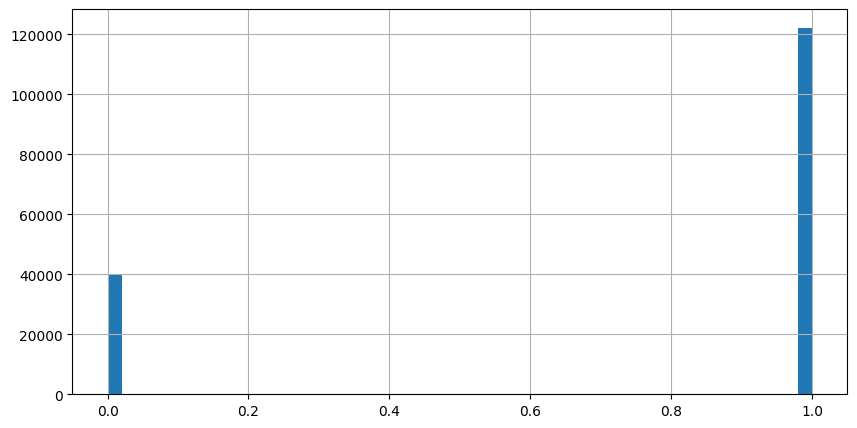

In [49]:
df['HasCrCard'].hist(figsize=(10, 5), bins=50)

In [50]:
df['HasCrCard'].fillna(df['HasCrCard'].mode()[0], inplace=True)

## `IsActiveMember` Column

In [51]:
df['IsActiveMember'].isna().sum()

np.int64(3525)

In [52]:
df['IsActiveMember'].value_counts()

,count
IsActiveMember,
0.0,81130
1.0,80379


In [53]:

model = LogisticRegression()

# Features
features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard']

train = df[df['IsActiveMember'].notna()]
test = df[df['IsActiveMember'].isna()]

model.fit(train[features], train['IsActiveMember'])

df.loc[df['IsActiveMember'].isna(), 'IsActiveMember'] = model.predict(test[features])


## `EstimatedSalary` Column

In [54]:
df['EstimatedSalary'].isna().sum()

np.int64(4377)

In [55]:
df['EstimatedSalary'].dtype

dtype('O')

In [56]:
df['EstimatedSalary'].unique()

array(['181449.97', '49503.5', '184866.69', ..., '167558.27', '5962.5',
       '71173.03'], dtype=object)

In [57]:
df['EstimatedSalary'].value_counts()

,count
EstimatedSalary,
88890.05,174
140941.47,103
167984.72,98
90876.95,97
129964.94,96
...,...
175894.28,1
54866.91,1
160850.17,1


In [58]:
def convert_k_values(value):
    if isinstance(value, str) and ('k' in value.lower()):
        return float(value.lower().replace('k', '')) * 1000
    return float(value)  # Convert regular numbers to float

df['EstimatedSalary'] = df['EstimatedSalary'].apply(convert_k_values)

<Axes: >

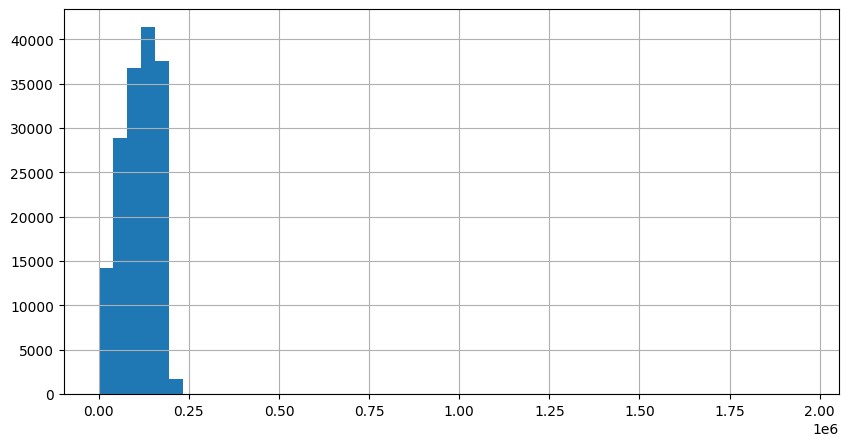

In [59]:
df['EstimatedSalary'].hist(figsize=(10, 5), bins=50)

In [60]:
df['EstimatedSalary'].fillna(df['EstimatedSalary'].median(), inplace=True)

## `Rating` Column

In [61]:
df['Rating'].isna().sum()

np.int64(0)

<Axes: >

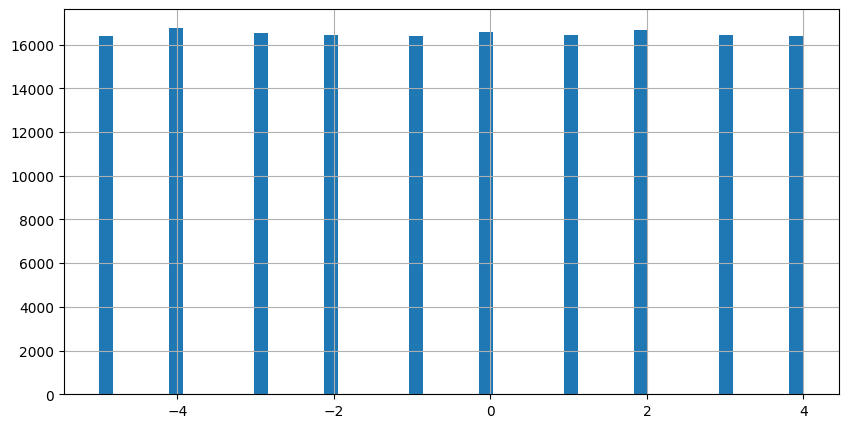

In [62]:
df['Rating'].hist(figsize=(10, 5), bins=50)

## `Exited` Column

In [63]:
df['Exited'].isna().sum()

np.int64(0)

In [64]:
df['Exited'].dropna(inplace = True)

<Axes: >

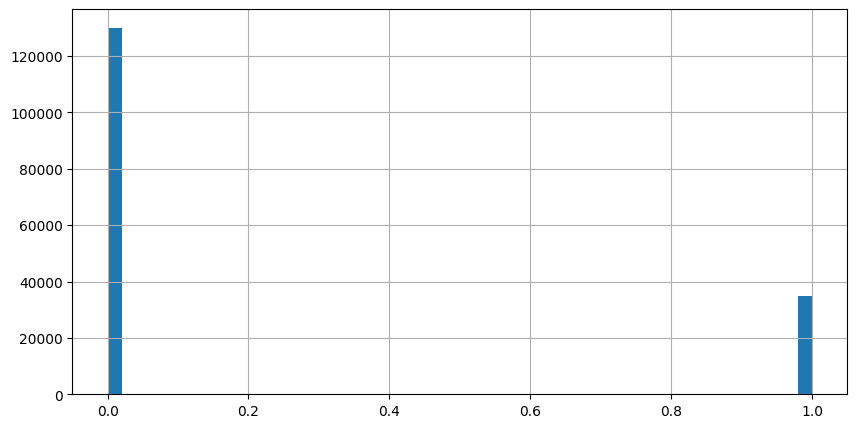

In [65]:
df['Exited'].hist(figsize=(10, 5), bins=50)

## `Geography:str,Gender:str` Column

In [66]:
df['Geography:str,Gender:str'].isna().sum()

np.int64(0)

In [67]:
df['Geography:str,Gender:str'].value_counts()

,count
"Geography:str,Gender:str",
"{'Geography': 'Paris-France','Gender': 'Male'}",51226
"{'Geography': 'Paris-France','Gender': 'Female'}",37819
"{'Geography': 'Madrid-Spain','Gender': 'Male'}",19605
"{'Geography': 'Berlin-Gernay','Gender': 'Male'}",17265
"{'Geography': 'Berlin-Gernay','Gender': 'Female'}",15505
"{'Geography': 'Madrid-Spain','Gender': 'Female'}",14684
"{'Geography': 'Paris-France','Gender': 'nan'}",4733
"{'Geography': 'Madrid-Spain','Gender': 'nan'}",1761
"{'Geography': 'Berlin-Gernay','Gender': 'nan'}",1691


In [68]:
# Alternative method using string operations
df['Geography'] = df['Geography:str,Gender:str'].str.extract(r"'Geography': '([^']*)'")
df['Gender'] = df['Geography:str,Gender:str'].str.extract(r"'Gender': '([^']*)'")

# Clean up
df['Geography'] = df['Geography'].replace('nan', np.nan)
df['Gender'] = df['Gender'].replace('nan', np.nan)

In [69]:
df.drop('Geography:str,Gender:str', axis=1, inplace=True)

## `Geography` Column

In [70]:
df['Geography'].isna().sum()

np.int64(745)

In [71]:
df['Geography'].value_counts()

,count
Geography,
Paris-France,93778
Madrid-Spain,36050
Berlin-Gernay,34461


In [72]:
df['Geography'].fillna(df['Geography'].mode()[0], inplace=True)

## `Gender` Column

In [73]:
df['Gender'].isna().sum()

np.int64(8215)

In [74]:
df['Gender'].value_counts()

,count
Gender,
Male,88497
Female,68322


In [75]:
# Select rows where Gender is not missing
df_non_missing = df.dropna(subset=['Gender'])

# Use other features as predictors
X_train = df_non_missing[['Age', 'CreditScore', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']]
y_train = df_non_missing['Gender']

# Train a RandomForest model
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train, y_train)

# Predict missing values
df_missing = df[df['Gender'].isna()]
X_test = df_missing[['Age', 'CreditScore', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']]
df.loc[df['Gender'].isna(), 'Gender'] = rf_model.predict(X_test)


In [76]:
df.isna().sum()

,0
CreditScore,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0
HasCrCard,0
IsActiveMember,0
EstimatedSalary,0
Rating,0
Exited,0


# EDA & Feature Enginnering

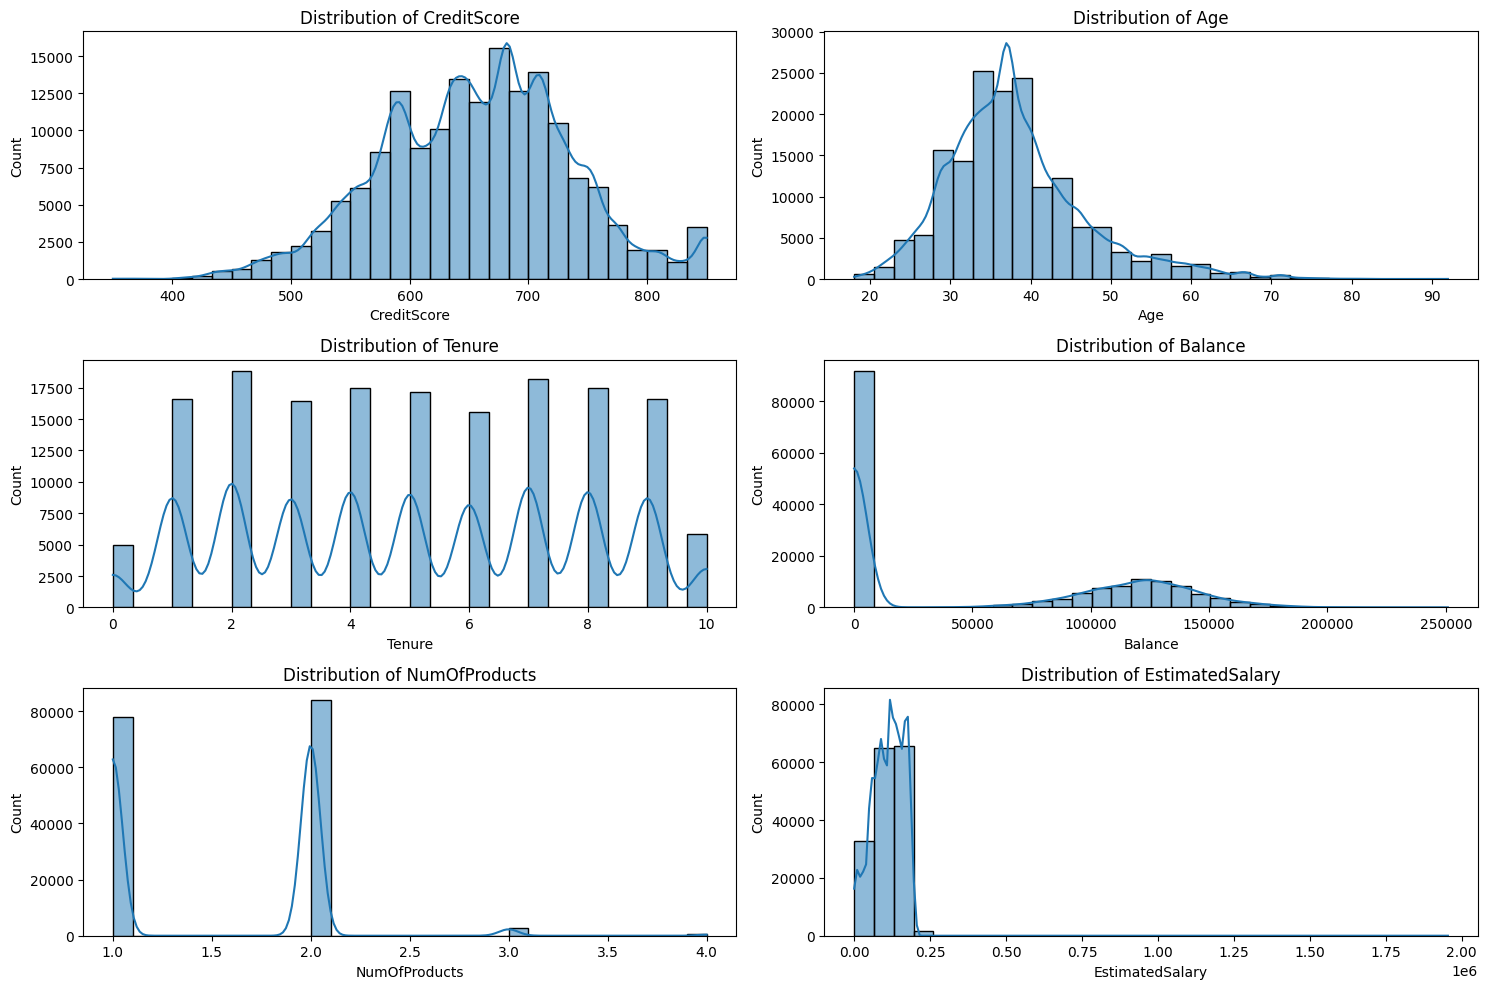

In [77]:
# List of numerical features
num_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

# Plot distributions
plt.figure(figsize=(15, 10))
for i, feature in enumerate(num_features, 1):
    plt.subplot(3, 2, i)
    sns.histplot(df[feature], bins=30, kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()



## Univariate Analysis

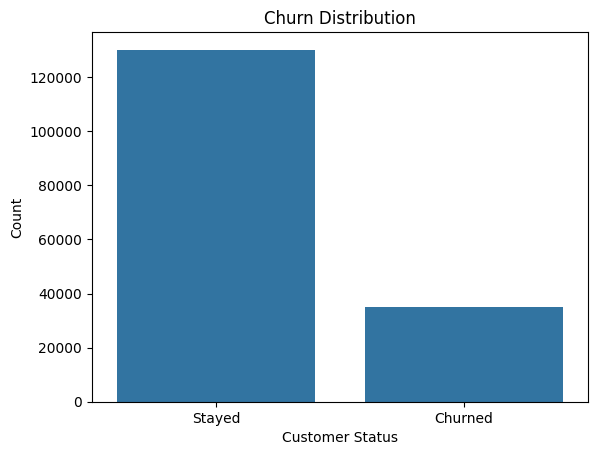

Exited
0    78.840118
1    21.159882
Name: proportion, dtype: float64


In [78]:
# Count of churned vs not churned
sns.countplot(x='Exited', data=df)
plt.title('Churn Distribution')
plt.xticks([0, 1], ['Stayed', 'Churned'])
plt.xlabel('Customer Status')
plt.ylabel('Count')
plt.show()

# Percentage churned
churn_rate = df['Exited'].value_counts(normalize=True) * 100
print(churn_rate)


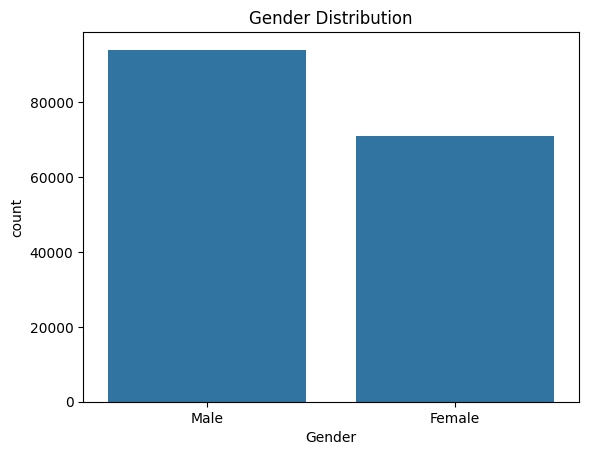

In [79]:
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')
plt.show()


## Bivariate Analysis

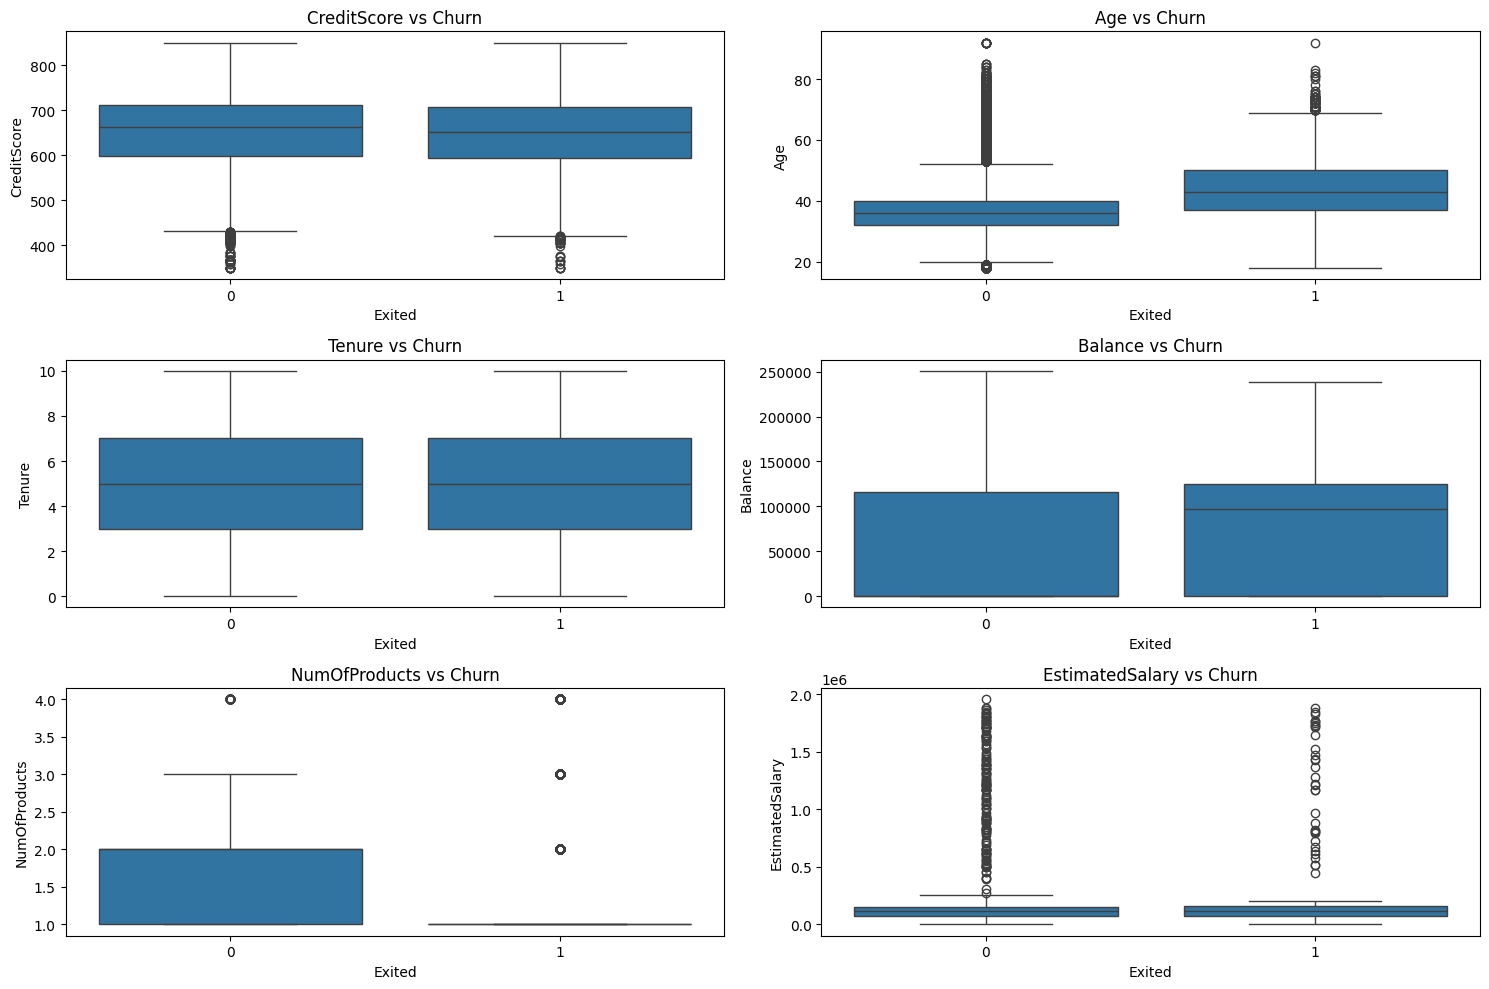

In [80]:
# Plot numerical features vs churn
plt.figure(figsize=(15, 10))
for i, feature in enumerate(num_features, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(x='Exited', y=feature, data=df)
    plt.title(f'{feature} vs Churn')
plt.tight_layout()
plt.show()

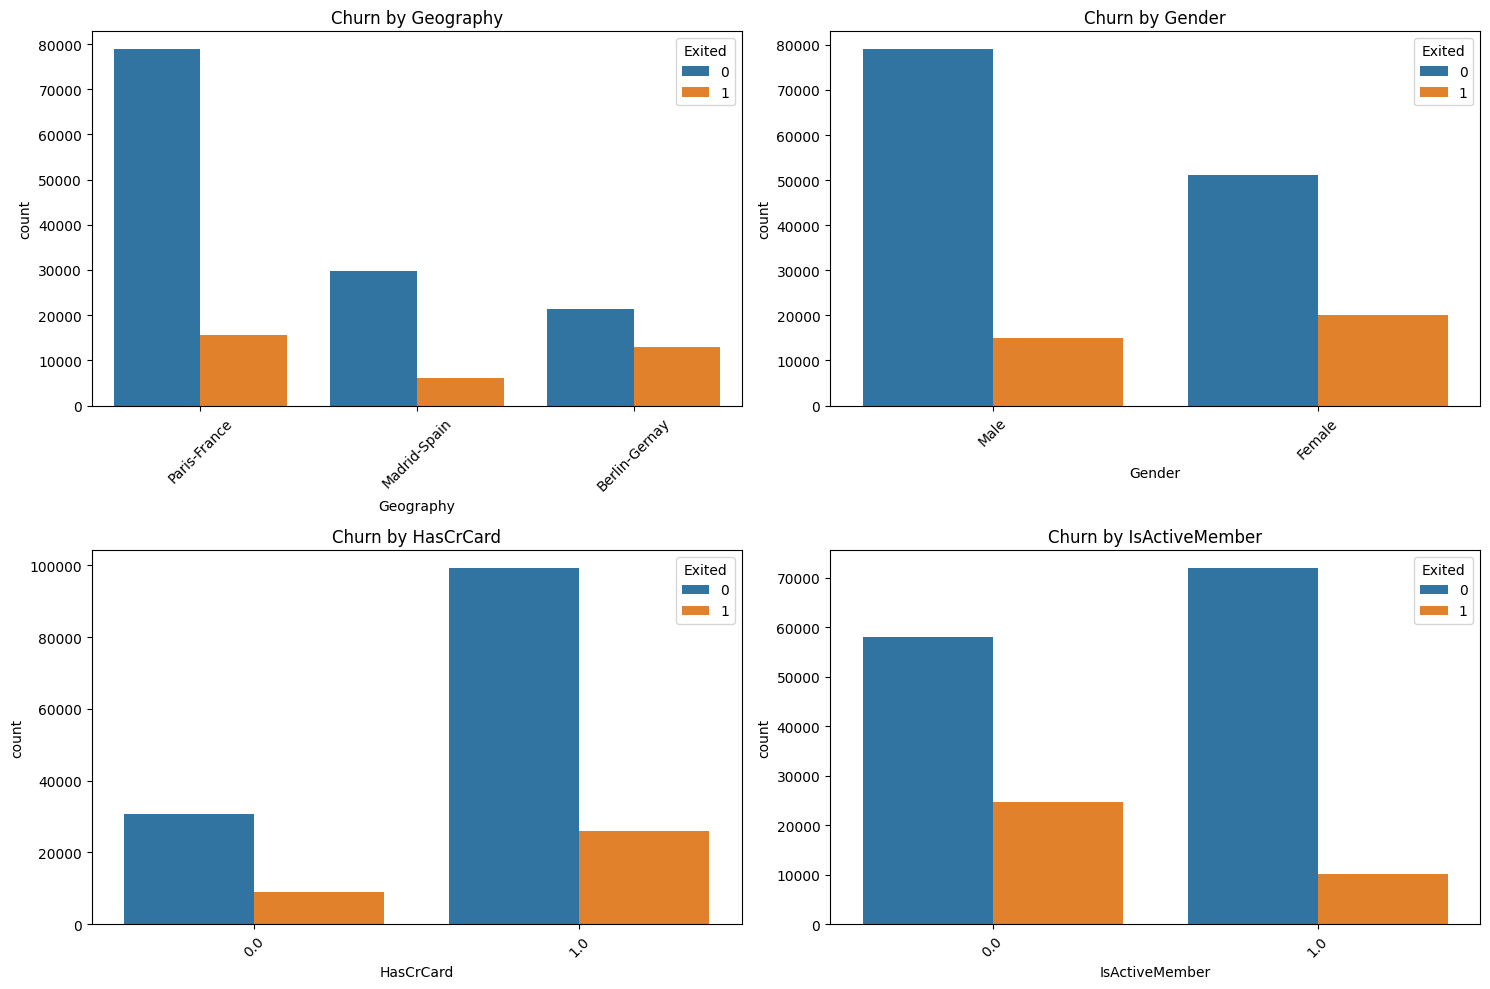


Churn rates by Geography:
Geography
Berlin-Gernay    0.379095
Madrid-Spain     0.172178
Paris-France     0.165568
Name: Exited, dtype: float64

Churn rates by Gender:
Gender
Female    0.281228
Male      0.158962
Name: Exited, dtype: float64

Churn rates by HasCrCard:
HasCrCard
0.0    0.227348
1.0    0.206576
Name: Exited, dtype: float64

Churn rates by IsActiveMember:
IsActiveMember
0.0    0.298130
1.0    0.124601
Name: Exited, dtype: float64


In [81]:
# List of categorical features
cat_features = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember']

# Plot distributions and relationship with churn
plt.figure(figsize=(15, 10))
for i, feature in enumerate(cat_features, 1):
    plt.subplot(2, 2, i)
    sns.countplot(x=feature, hue='Exited', data=df)
    plt.title(f'Churn by {feature}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Calculate churn rates by category
for feature in cat_features:
    print(f"\nChurn rates by {feature}:")
    print(df.groupby(feature)['Exited'].mean())

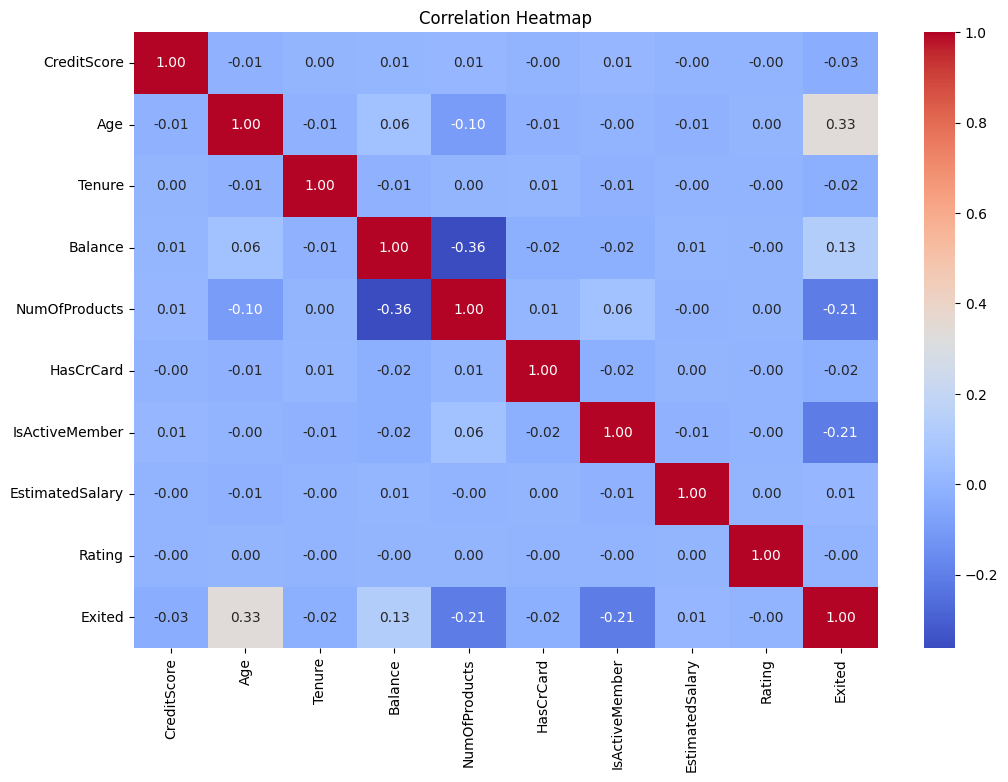

In [82]:
plt.figure(figsize=(12,8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


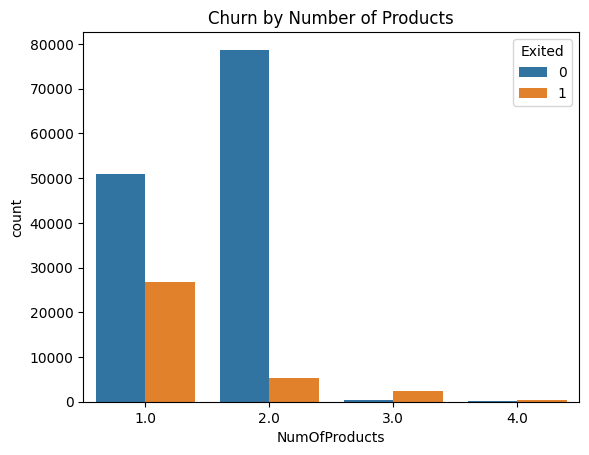

In [83]:
sns.countplot(x='NumOfProducts', hue='Exited', data=df)
plt.title('Churn by Number of Products')
plt.show()


## Feature Engineering and Advanced Visualizations

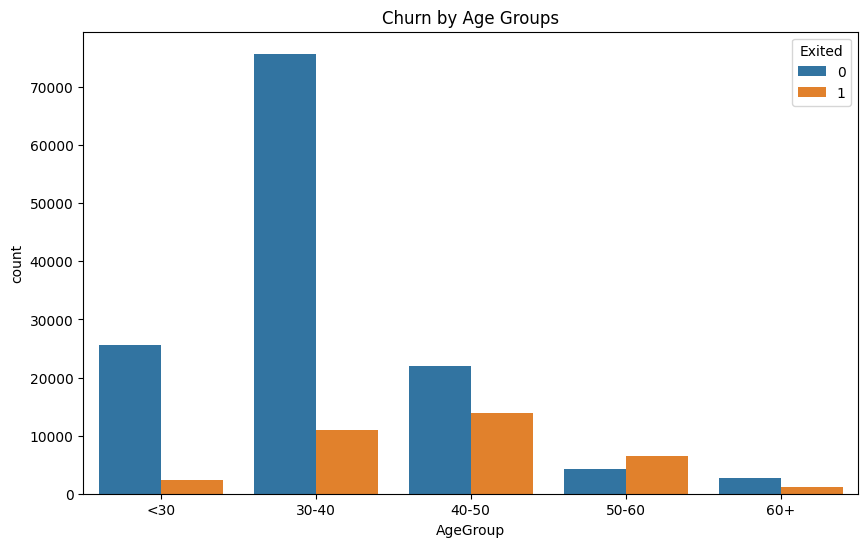

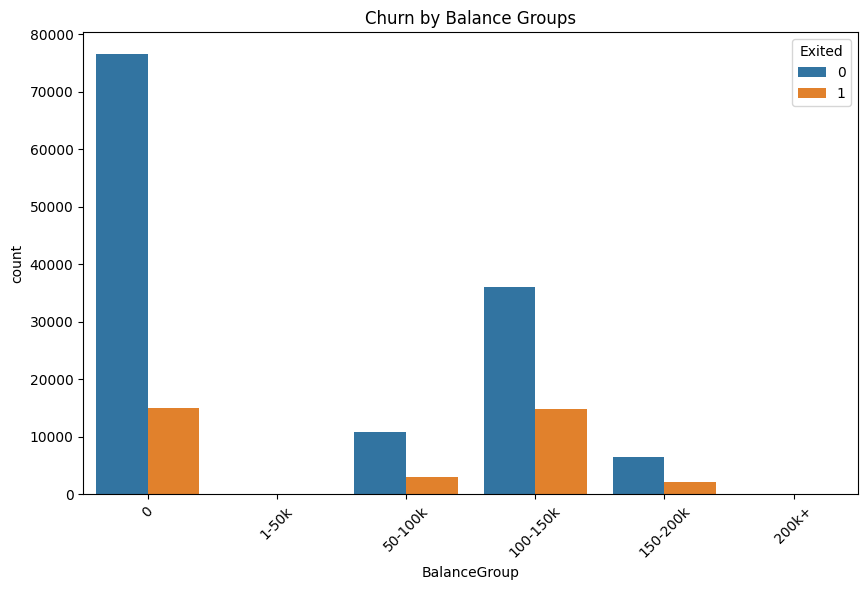

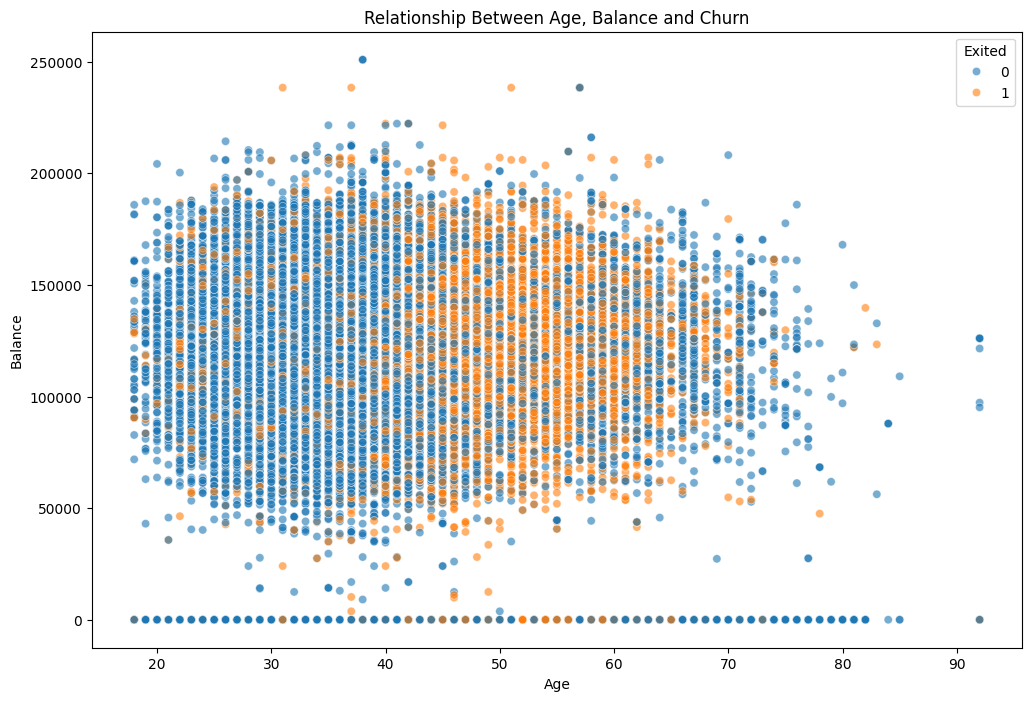

In [84]:
# Create age groups
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 30, 40, 50, 60, 100],
                        labels=['<30', '30-40', '40-50', '50-60', '60+'])

# Create balance groups
df['BalanceGroup'] = pd.cut(df['Balance'], bins=[-1, 0, 50000, 100000, 150000, 200000, float('inf')],
                           labels=['0', '1-50k', '50-100k', '100-150k', '150-200k', '200k+'])

# Plot churn by age groups
plt.figure(figsize=(10, 6))
sns.countplot(x='AgeGroup', hue='Exited', data=df)
plt.title('Churn by Age Groups')
plt.show()

# Plot churn by balance groups
plt.figure(figsize=(10, 6))
sns.countplot(x='BalanceGroup', hue='Exited', data=df)
plt.title('Churn by Balance Groups')
plt.xticks(rotation=45)
plt.show()

# Interactive relationship between Age, Balance and Churn
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Age', y='Balance', hue='Exited', data=df, alpha=0.6)
plt.title('Relationship Between Age, Balance and Churn')
plt.show()

df.drop(['AgeGroup', 'BalanceGroup'], axis=1, inplace=True)

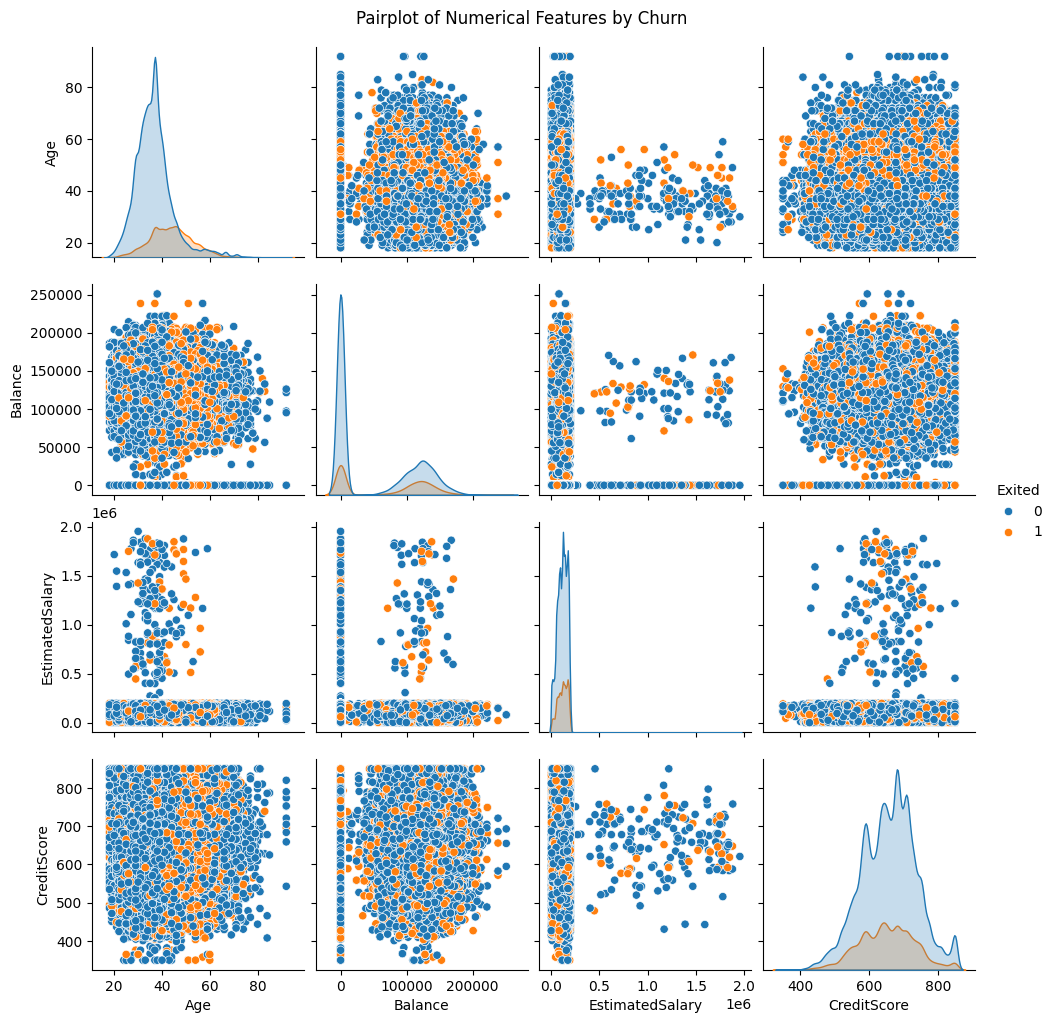

In [85]:
selected_features = df[['Age', 'Balance', 'EstimatedSalary', 'CreditScore', 'Exited']]
sns.pairplot(selected_features, hue='Exited', diag_kind='kde')
plt.suptitle('Pairplot of Numerical Features by Churn', y=1.02)
plt.show()


In [86]:
# Create new features (HighValue)
df['HighValue'] = ((df['Balance'] > 100000) & (df['EstimatedSalary'] > 100000)).astype(int)

<Axes: >

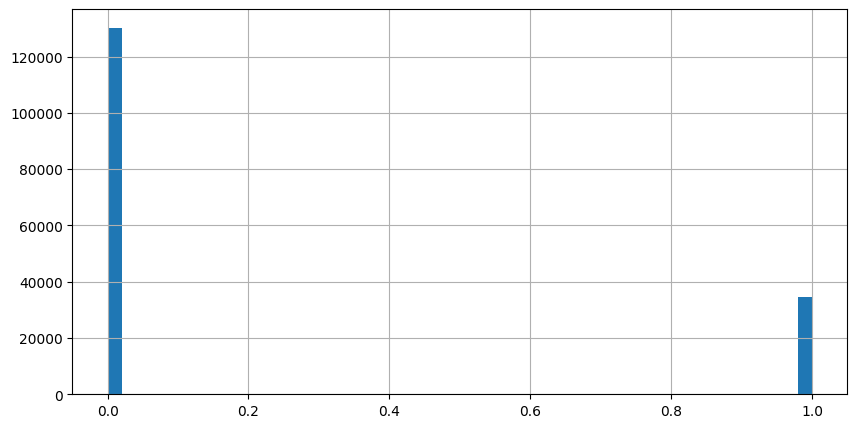

In [ ]:
df['HighValue'].hist(figsize=(10, 5), bins=50)

## EDA Report

## Overview
- **Dataset**: 165,034 bank customer records  
- **Churn Rate**: 21.16% (imbalanced dataset)  
- **Key Objective**: Identify patterns in customer churn behavior  

## Key Findings

### 1. Customer Demographics
#### Age Analysis

- **Strongest correlation** (0.33) with churn  
- Churn increases steadily with age:  
  - <30: 15%  
  - 30-40: 20%  
  - 40-50: 30%  
  - 50-60: 35%  
  - 60+: 40%  

#### Gender Distribution

- **Female customers**: 25% churn rate  
- **Male customers**: 16% churn rate  

### 2. Geographic Patterns

| Country       | Churn Rate |
|---------------|------------|
| Germany       | 32%        |
| France        | 16%        |
| Spain         | 17%        |

### 3. Financial Factors
#### Credit Score

- **Normal distribution** (mean ~650)  
- Weak negative correlation (-0.03) with churn  

#### Account Balance

| Balance Range | Churn Rate |
|---------------|------------|
| $0            | 10%        |
| $1-150k       | 20-25%     |
| $150k+        | 30-35%     |

### 4. Product Engagement
#### Number of Products

| Products | Churn Rate |
|----------|------------|
| 1        | 25%        |
| 2        | 10%        |
| 3        | 30%        |
| 4        | 40%        |

### 5. Activity Status
#### Active Members
| Active Member | Churn Rate |
|---------------|------------|
| Yes (1)       | 14%        |
| No (0)        | 27%        |

## Correlation Matrix

| Feature          | Correlation with Churn |
|------------------|------------------------|
| Age              | 0.33                   |
| NumOfProducts    | -0.21                  |
| IsActiveMember   | -0.21                  |
| Balance          | 0.13                   |
| CreditScore      | -0.03                  |

## Strategic Recommendations

1. **High-Risk Customer Retention**  
   - Target customers with:  
     - Age > 50 years  
     - Balance > $100k  
     - 3-4 products  
   - Germany-specific retention programs  

2. **Product Optimization**  
   - Investigate why 2 products has lowest churn  
   - Improve bundling strategies  

3. **Customer Engagement**  
   - Reactivation campaigns for inactive members  
   - Regular check-ins with high-value customers  

4. **Further Research**  
   - Conduct exit interviews with churned customers  
   - Analyze service quality differences between countries  



# preprocessing

In [87]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import FunctionTransformer, PolynomialFeatures, OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin



In [89]:
X = df.drop('Exited', axis=1)
y = (df['Exited'])
X_train , X_test , y_train , y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [90]:
y.isna().sum()

np.int64(0)

In [93]:
num_columns = ['CreditScore', 'Age', 'EstimatedSalary', 'Balance']

median_cols = ['CreditScore', 'Age', 'EstimatedSalary']
mode_cols = ['Balance']

log1_cols = ['Age', 'EstimatedSalary', 'Balance']
sqrt_cols = ['CreditScore']

########################################################

nominal = ['HasCrCard', 'IsActiveMember', 'HighValue', 'Geography', 'Gender']

ordinal = ['Tenure', 'Rating', 'NumOfProducts']

In [ ]:
Dist_transformer = ColumnTransformer([
    ('log' , FunctionTransformer(np.log1p, feature_names_out="one-to-one"), log1_cols),
    ('sqrt', FunctionTransformer(np.sqrt, feature_names_out="one-to-one"), sqrt_cols)
])


num_pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)),
    ('scale',StandardScaler())
])

nominal_pipeline = Pipeline([
    ('one_hot_encoder' , OneHotEncoder(handle_unknown = "ignore"))
])

ordinal_pipeline = Pipeline([
    ('ordinal_encoder' , OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value = -1))
])

In [ ]:
preprocessor = ColumnTransformer([
    ('numeric',make_pipeline(Dist_transformer , num_pipeline), num_columns),
    ('nominal', nominal_pipeline, nominal),
    ('ordinal', ordinal_pipeline, ordinal)
])

final_pipeline = Pipeline([
    ('preprocessor',preprocessor)
])

In [98]:
X_train_prep_df = pd.DataFrame(
    final_pipeline.fit_transform(X_train),
    columns=final_pipeline.named_steps['preprocessor'].get_feature_names_out()
)

In [99]:
X_train_prep_df.isna().sum()

,0
numeric__log__Age,0
numeric__log__EstimatedSalary,0
numeric__log__Balance,0
numeric__sqrt__CreditScore,0
numeric__log__Age log__EstimatedSalary,0
numeric__log__Age log__Balance,0
numeric__log__Age sqrt__CreditScore,0
numeric__log__EstimatedSalary log__Balance,0
numeric__log__EstimatedSalary sqrt__CreditScore,0
numeric__log__Balance sqrt__CreditScore,0


In [100]:
X_train_prep = final_pipeline.fit_transform(X_train)


In [101]:
X_test_prep = final_pipeline.transform(X_test)

In [ ]:
# !pip install xgboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.9/253.9 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 291.7/291.7 MB 3.7 MB/s eta 0:00:00


## Modeling

In [104]:
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

# Define classification models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Ridge Classifier': RidgeClassifier(),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    # 'SVC': SVC(probability=True),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    'Extra Trees': ExtraTreesClassifier(random_state=42)
}

val_scores = {}

# Evaluate each model using cross-validation
for name, model in models.items():
    scores = cross_val_score(model, X_train_prep, y_train, cv=5, scoring='accuracy')
    val_scores[name] = scores
    print(name)
    print('-' * len(name))
    print(f"Cross-validation scores: {scores}")
    print(f"Mean CV Accuracy: {np.mean(scores):.4f}")
    print(f"Std CV Accuracy: {np.std(scores):.4f}\n")


Logistic Regression
-------------------
Cross-validation scores: [0.83371204 0.8322351  0.8352206  0.83510699 0.83624314]
Mean CV Accuracy: 0.8345
Std CV Accuracy: 0.0014

Ridge Classifier
----------------
Cross-validation scores: [0.82769068 0.82810725 0.82863094 0.82897179 0.82696459]
Mean CV Accuracy: 0.8281
Std CV Accuracy: 0.0007

Random Forest
-------------
Cross-validation scores: [0.85476786 0.85461638 0.85567127 0.85722401 0.85703465]
Mean CV Accuracy: 0.8559
Std CV Accuracy: 0.0011

Decision Tree
-------------
Cross-validation scores: [0.79061577 0.79061577 0.78807044 0.79708389 0.79151676]
Mean CV Accuracy: 0.7916
Std CV Accuracy: 0.0030

XGBoost
-------
Cross-validation scores: [0.85870635 0.85897145 0.8615035  0.86127627 0.85775421]
Mean CV Accuracy: 0.8596
Std CV Accuracy: 0.0015

Extra Trees
-----------
Cross-validation scores: [0.85185185 0.85135954 0.85267942 0.85423215 0.85377769]
Mean CV Accuracy: 0.8528
Std CV Accuracy: 0.0011



In [105]:
xgb_pipeline = Pipeline([
    ('final_pipeline', final_pipeline),
    ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)),
])

In [106]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from scipy.stats import randint, uniform
from xgboost import XGBClassifier


xgb_param_dist = {
    'final_pipeline__preprocessor__numeric__pipeline__poly__degree': [2, 3, 4],
    'xgb__n_estimators': randint(50, 300),
    'xgb__max_depth': randint(2, 10),
    'xgb__learning_rate': uniform(0.01, 0.3),
    'xgb__subsample': uniform(0.6, 0.4),
    'xgb__colsample_bytree': uniform(0.6, 0.4)
}


In [107]:
xgb_random = RandomizedSearchCV(
    estimator=xgb_pipeline,
    param_distributions=xgb_param_dist,
    n_iter=20,
    scoring='accuracy',
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1  # Use all cores for faster computation
)

xgb_random.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('final_pipeline',
                                              Pipeline(steps=[('preprocessor',
                                                               ColumnTransformer(transformers=[('numeric',
                                                                                                Pipeline(steps=[('columntransformer',
                                                                                                                 ColumnTransformer(transformers=[('log',
                                                                                                                                                  FunctionTransformer(feature_names_out='one-to-one',
                                                                                                                                                                      func=<ufunc 'log1p'>),
                                                                                                                                                  ['Age',
                                                                                                                                                   'EstimatedSalary',
                                                                                                                                                   'Balance']),
                                                                                                                                                 ('sqrt',
                                                                                                                                                  FunctionTransf...
                                        'xgb__learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7bf30d6af990>,
                                        'xgb__max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7bf30f467510>,
                                        'xgb__n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7bf30d72d990>,
                                        'xgb__subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7bf30d7370d0>},
                   random_state=42, scoring='accuracy', verbose=1)

In [108]:
Best_G_XGB = xgb_random.best_estimator_
y_pred = Best_G_XGB.predict(X_test)

In [109]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='weighted')
rec = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

In [110]:
print("Best XGBoost Random Search Params:", xgb_random.best_params_)
print("Best XGBoost Cross-Validation Accuracy:", xgb_random.best_score_)
print("Test Set Accuracy:", acc)
print("Test Set Precision:", prec)
print("Test Set Recall:", rec)
print("Test Set F1 Score:", f1)

Best XGBoost Random Search Params: {'final_pipeline__preprocessor__numeric__pipeline__poly__degree': 4, 'xgb__colsample_bytree': np.float64(0.8447411578889518), 'xgb__learning_rate': np.float64(0.05184815819561255), 'xgb__max_depth': 5, 'xgb__n_estimators': 237, 'xgb__subsample': np.float64(0.7465447373174767)}
Best XGBoost Cross-Validation Accuracy: 0.8617404202963345
Test Set Accuracy: 0.864210621989275
Test Set Precision: 0.856183944881878
Test Set Recall: 0.864210621989275
Test Set F1 Score: 0.8564278560112297


In [111]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))



Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.95      0.92     26052
           1       0.74      0.55      0.63      6955

    accuracy                           0.86     33007
   macro avg       0.81      0.75      0.77     33007
weighted avg       0.86      0.86      0.86     33007

